# Use KNN to classify the data
* this notebook will write methods to use KNN for classfying on all the data for different subject files 
* The goal is to be able to find which subject files give the most classfication scores using knn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler
from mne.decoding import SPoC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
import mne
from sklearn.model_selection import StratifiedKFold
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                          cross_val_multiscore, LinearModel, get_coef)
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE 
import os
import os.path as op
from os import listdir
from os.path import isfile, join
from collections import defaultdict

In [ ]:
epoch=mne.read_epochs('C:\\USB Drive\\EpochedEEG\\20131216_1441_epo.fif',preload=True)

In [4]:
X = epoch.get_data()
y=epoch.events[:,-1]

clf = make_pipeline(Vectorizer(),
                        KNN(n_neighbors=13))
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
    
clf.fit(X_train, y_train)
    
score = clf.score(X_test, y_test)
print (score)

0.7874692874692875


In [5]:
epoch.events[:,-1]

array([131,  31, 144, ...,   1, 131, 134])

In [2]:
X = epoch.get_data()
y=epoch.events[:,-1]

clf = make_pipeline(Vectorizer(),
                        LogisticRegression())
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
    
clf.fit(X_train, y_train)
    
    
score = clf.score(X_test, y_test)
print (score)

NameError: name 'epoch' is not defined

In [2]:
def get_samples_targets(epochs):
    X = epochs.get_data();
    y = epochs.events[:,-1]
    return X, y

In [3]:
def classify_test_KNN(X,y):

    clf = make_pipeline(Vectorizer(),
                        StandardScaler(),
                        KNN(n_neighbors=11))
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
    
    clf.fit(X_train, y_train)
    
    score = clf.score(X_test, y_test)
    
    return score

In [ ]:
scores1 = []

path = 'C:\\USB Drive\\EpochedEEG\\run1'
subject_runs = [f for f in listdir(path) if isfile(join(path, f))]
for f in subject_runs:
    epochs = mne.read_epochs(op.join(path, f),
                          preload=True);
    X,y = get_samples_targets(epochs)
    scores1.append([f, classify_test_KNN(X,y)])
    print(scores1)

Reading C:\USB Drive\EpochedEEG\run1\20131216_1441_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5424 matching events found
Applying baseline correction (mode: mean)
5424 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
[['20131216_1441_epo.fif', 0.7917690417690417]]
Reading C:\USB Drive\EpochedEEG\run1\20140205_1114_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5379 matching events found
Applying baseline correction (mode: mean)
5379 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
[['20131216_1441_epo.fif', 0.7917690417690417], ['20140205_1114_epo.fif', 0.7100371747211895]]
Reading C:\USB Drive\EpochedEEG\run1\20140205_1230_epo.fif ...
    Found the data of interest:
        t =    -199.22

In [2]:
scores1

NameError: name 'scores1' is not defined

In [1]:
scores1=[['20131216_1441_epo.fif', 0.7917690417690417], ['20140205_1114_epo.fif', 0.7100371747211895], ['20140205_1230_epo.fif', 0.6341317365269461], ['20140206_1029_epo.fif', 0.6813118811881188]]

In [3]:
scores1

[['20131216_1441_epo.fif', 0.7917690417690417],
 ['20140205_1114_epo.fif', 0.7100371747211895],
 ['20140205_1230_epo.fif', 0.6341317365269461],
 ['20140206_1029_epo.fif', 0.6813118811881188]]

In [ ]:
scores1 = []

path = 'C:\\USB Drive\\EpochedEEG\\run1'
subject_runs = [f for f in listdir(path) if isfile(join(path, f))]
for f in subject_runs:
    epochs = mne.read_epochs(op.join(path, f),
                          preload=True);
    X,y = get_samples_targets(epochs)
    scores1.append([f, classify_test_KNN(X,y)])
    print(scores1)

Reading C:\USB Drive\EpochedEEG\run1\20140207_1146_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5398 matching events found
Applying baseline correction (mode: mean)
5398 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
[['20140207_1146_epo.fif', 0.6938271604938272]]
Reading C:\USB Drive\EpochedEEG\run1\20140207_1219_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5575 matching events found
Applying baseline correction (mode: mean)
5575 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
[['20140207_1146_epo.fif', 0.6938271604938272], ['20140207_1219_epo.fif', 0.6796174536760311]]
Reading C:\USB Drive\EpochedEEG\run1\20140217_1136_epo.fif ...
    Found the data of interest:
        t =    -199.22

In [1]:
scores1=[['20131216_1441_epo.fif', 0.7917690417690417], ['20140205_1114_epo.fif', 0.7100371747211895], ['20140205_1230_epo.fif', 0.6341317365269461], ['20140206_1029_epo.fif', 0.6813118811881188],['20140207_1146_epo.fif', 0.6938271604938272], ['20140207_1219_epo.fif', 0.6796174536760311], ['20140217_1136_epo.fif', 0.763126491646778]]

In [2]:
scores1

[['20131216_1441_epo.fif', 0.7917690417690417],
 ['20140205_1114_epo.fif', 0.7100371747211895],
 ['20140205_1230_epo.fif', 0.6341317365269461],
 ['20140206_1029_epo.fif', 0.6813118811881188],
 ['20140207_1146_epo.fif', 0.6938271604938272],
 ['20140207_1219_epo.fif', 0.6796174536760311],
 ['20140217_1136_epo.fif', 0.763126491646778]]

In [6]:
scores1 = []

path = 'C:\\USB Drive\\EpochedEEG\\run1'
subject_runs = [f for f in listdir(path) if isfile(join(path, f))]
for f in subject_runs:
    epochs = mne.read_epochs(op.join(path, f),
                          preload=True);
    X,y = get_samples_targets(epochs)
    scores1.append([f, classify_test_KNN(X,y)])
    print(scores1)

Reading C:\USB Drive\EpochedEEG\run1\20140217_1211_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5410 matching events found
Applying baseline correction (mode: mean)
5410 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
[['20140217_1211_epo.fif', 0.7547751078250154]]
Reading C:\USB Drive\EpochedEEG\run1\20140219_1046_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5433 matching events found
Applying baseline correction (mode: mean)
5433 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
[['20140217_1211_epo.fif', 0.7547751078250154], ['20140219_1046_epo.fif', 0.7380368098159509]]


In [4]:
scores1=[['20131216_1441_epo.fif', 0.7917690417690417], ['20140205_1114_epo.fif', 0.7100371747211895], ['20140205_1230_epo.fif', 0.6341317365269461], ['20140206_1029_epo.fif', 0.6813118811881188],['20140207_1146_epo.fif', 0.6938271604938272], ['20140207_1219_epo.fif', 0.6796174536760311], ['20140217_1136_epo.fif', 0.763126491646778],['20140217_1211_epo.fif', 0.7547751078250154], ['20140219_1046_epo.fif', 0.7380368098159509]]

In [5]:
scores1

[['20131216_1441_epo.fif', 0.7917690417690417],
 ['20140205_1114_epo.fif', 0.7100371747211895],
 ['20140205_1230_epo.fif', 0.6341317365269461],
 ['20140206_1029_epo.fif', 0.6813118811881188],
 ['20140207_1146_epo.fif', 0.6938271604938272],
 ['20140207_1219_epo.fif', 0.6796174536760311],
 ['20140217_1136_epo.fif', 0.763126491646778],
 ['20140217_1211_epo.fif', 0.7547751078250154],
 ['20140219_1046_epo.fif', 0.7380368098159509]]

[['20131216_1441_epo.fif', 0.7917690417690417], ['20140205_1114_epo.fif', 0.7100371747211895], ['20140205_1230_epo.fif', 0.6341317365269461], ['20140206_1029_epo.fif', 0.6813118811881188], ['20140207_1146_epo.fif', 0.6938271604938272], ['20140207_1219_epo.fif', 0.6796174536760311], ['20140217_1136_epo.fif', 0.763126491646778], ['20140217_1211_epo.fif', 0.7547751078250154], ['20140219_1046_epo.fif', 0.7380368098159509]]


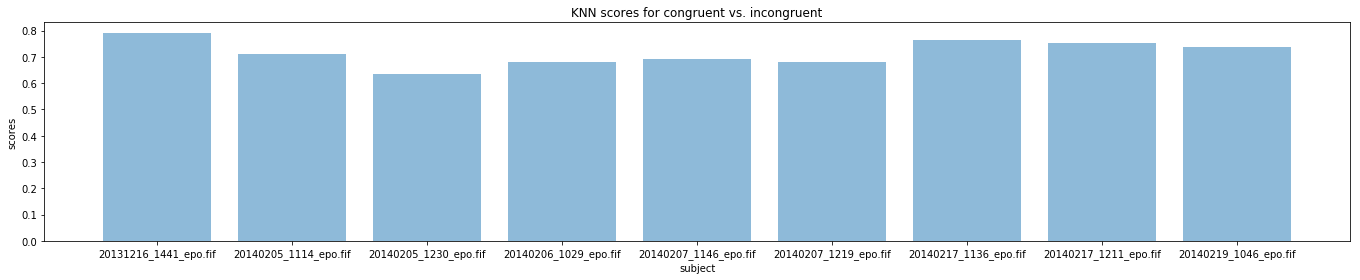

In [27]:
scores4=np.array(scores1)
print(scores1)
values4 = [float(x) for x in scores4[:,-1]]
subject = [x for x in scores4[:,0]]
fig, ax = plt.subplots(figsize = (19,4))
ax.bar(subject, values4, align='center', alpha=0.5);
ax.set_title('KNN scores for congruent vs. incongruent')
ax.set_xlabel('subject')
ax.set_ylabel('scores')
fig.tight_layout()

In [10]:
subject = [x for x in scores4[-1,:]]

In [23]:
scores4[:,0]

array(['20131216_1441_epo.fif', '20140205_1114_epo.fif',
       '20140205_1230_epo.fif', '20140206_1029_epo.fif',
       '20140207_1146_epo.fif', '20140207_1219_epo.fif',
       '20140217_1136_epo.fif', '20140217_1211_epo.fif',
       '20140219_1046_epo.fif'], dtype='<U21')

In [32]:
print(np.mean(values4))
print(np.max(values4))
print(np.min(values4))

0.716292539740322
0.7917690417690417
0.6341317365269461


In [1]:
values4

NameError: name 'values4' is not defined

[['20131216_1441_epo.fif', 0.7917690417690417], ['20140205_1114_epo.fif', 0.7100371747211895], ['20140205_1230_epo.fif', 0.6341317365269461], ['20140206_1029_epo.fif', 0.6813118811881188], ['20140207_1146_epo.fif', 0.6938271604938272], ['20140207_1219_epo.fif', 0.6796174536760311], ['20140217_1136_epo.fif', 0.763126491646778], ['20140217_1211_epo.fif', 0.7547751078250154], ['20140219_1046_epo.fif', 0.7380368098159509]]


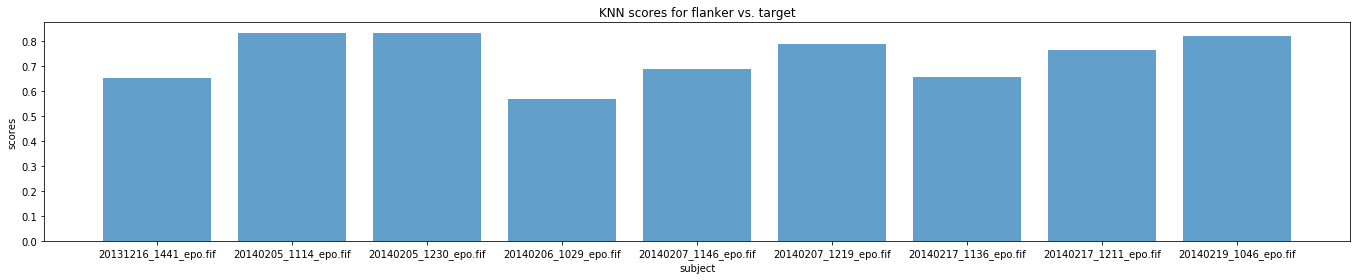

In [47]:
scores4=np.array(scores1)
print(scores1)
subject = [x for x in scores4[:,0]]
fig, ax = plt.subplots(figsize = (19,4))
ax.bar(subject, values4, align='center', alpha=0.7);
ax.set_title('KNN scores for flanker vs. target')
ax.set_xlabel('subject')
ax.set_ylabel('scores')
fig.tight_layout()

In [46]:
print(np.mean(values4))
print(np.max(values4))
print(np.min(values4))

0.7334991111111111
0.83276
0.56832
